# **Melanoma Classification**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Purpose and goal definition

Skin cancer is the most prevalent type of cancer. Melanoma, specifically, is responsible for 75% of skin cancer deaths, despite being the least common skin cancer. The American Cancer Society estimates over 100,000 new melanoma cases will be diagnosed in 2020. It's also expected that almost 7,000 people will die from the disease. As with other cancers, early and accurate detection—potentially aided by data science—can make treatment more effective.
Currently, dermatologists evaluate every one of a patient's moles to identify outlier lesions or “ugly ducklings” that are most likely to be melanoma. Existing AI approaches have not adequately considered this clinical frame of reference. Dermatologists could enhance their diagnostic accuracy if detection algorithms take into account “contextual” images within the same patient to determine which images represent a melanoma. If successful, classifiers would be more accurate and could better support dermatological clinic work.
Melanoma is a deadly disease, but if caught early, most melanomas can be cured with minor surgery. Image analysis tools that automate the diagnosis of melanoma will improve dermatologists' diagnostic accuracy. Better detection of melanoma has the opportunity to positively impact millions of people.

## Melanoma Overview

Malignant melanoma is a serious form of skin cancer that begins in cells known as melanocytes. While it is less common than basal cell carcinoma (BCC) and squamous cell carcinoma (SCC), this skin cancer is more dangerous because of its ability to spread to other organs more rapidly if it is not treated at an early stage.

### What is a melanocyte?

Melanocytes are skin cells found in the upper layer of skin. They produce a pigment known as melanin, which gives skin its color. There are two types of melanin: eumelanin and pheomelanin. When skin is exposed to ultraviolet (UV) radiation from the sun or tanning beds, it causes skin damage that triggers the melanocytes to produce more melanin, but only the eumelanin pigment attempts to protect the skin by causing the skin to darken or tan. Melanoma occurs when DNA damage from sunburns or tanning due to UV radiation triggers changes (mutations) in the melanocytes, resulting in uncontrolled cellular growth.

### What does melanoma look like?

we want to distinguish this malignant skin tumor from two types of benign lesions (nevis and seborrheic keratoses).

nevis is applied to a number of conditions caused by neoplasias and hyperplasias of melanocytes, as well as a number of pigmentation disorders, both hypermelanotic (containing increased melanin, the pigment responsible for skin color) and hypomelanotic (containing decreased melanin).

seborrheic keratoses is a common noncancerous (benign) skin growth. Seborrheic keratoses are usually brown, black or light tan. The growths (lesions) look waxy or scaly and slightly raised. They appear gradually, usually on the face, neck, chest or back.



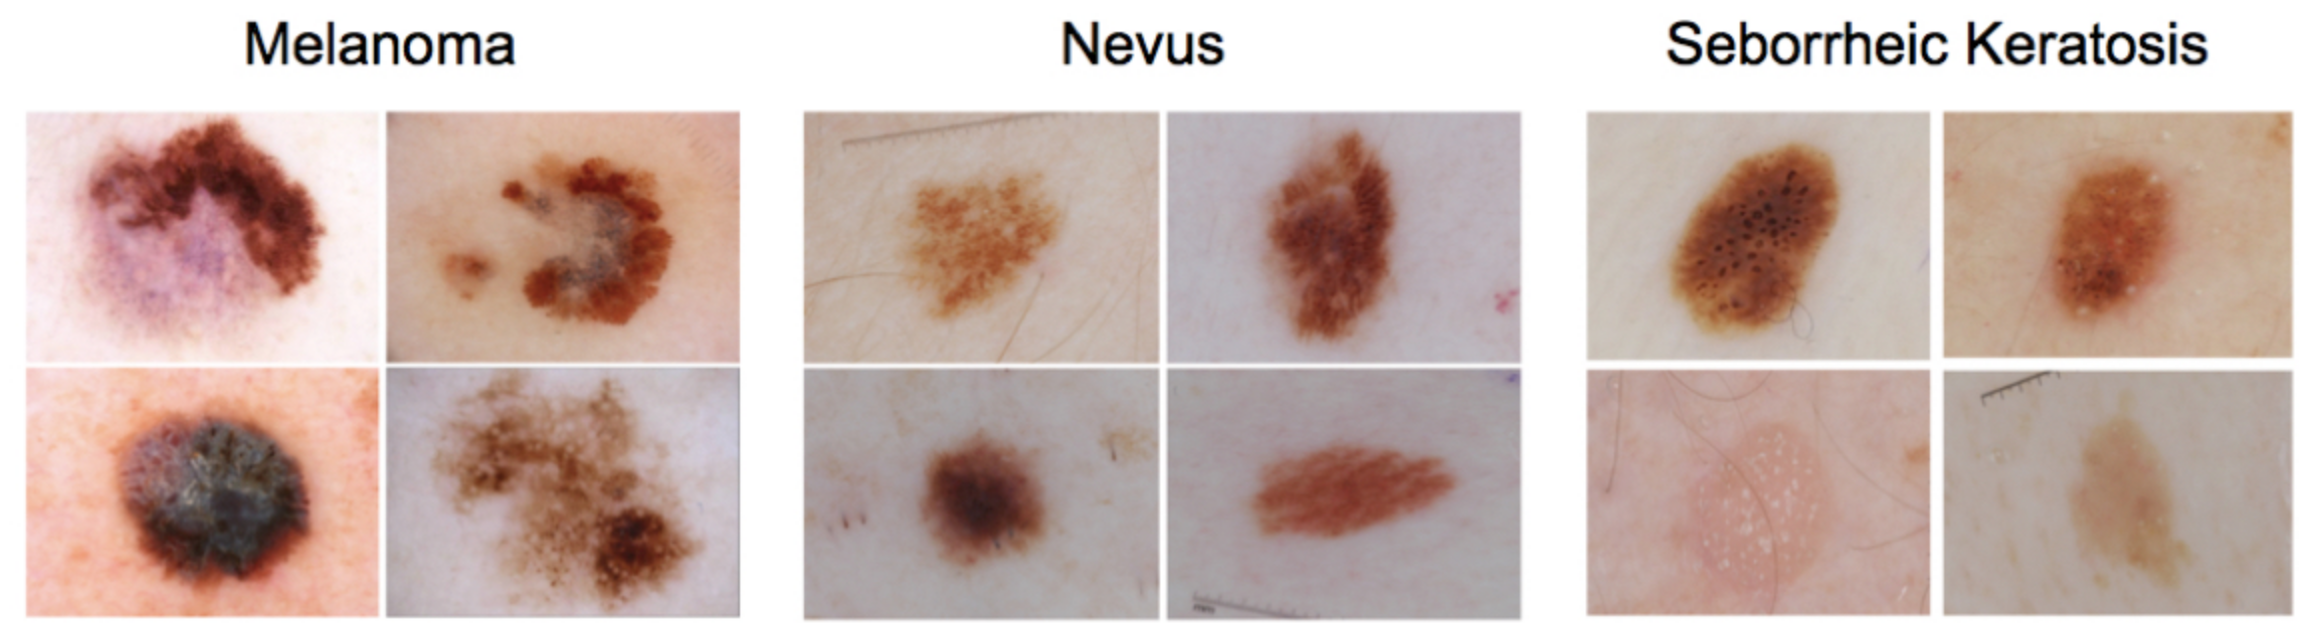

# Melanoma stage grouping

The stage of a cancer describes how much cancer is in the body. It helps determine how serious the cancer is and how best to treat it. Doctors also use a cancer's stage when talking about survival statistics.

Stage 0: This refers to melanoma in situ, which means melanoma cells are found only in the outer layer of skin or epidermis. This stage of melanoma is very unlikely to spread to other parts of the body.

Stage I: The primary melanoma is still only in the skin and is very thin. Stage I is divided into 2 subgroups, IA or IB, depending on the thickness of the melanoma and whether a pathologist sees ulceration under a microscope.

Stage II: Stage II melanoma is thicker than stage I melanoma, extending through the epidermis and further into the dermis, the dense inner layer of the skin. It has a higher chance of spreading. Stage II is divided into 3 subgroups—A, B, or C—depending on how thick the melanoma is and whether there is ulceration.

Stage III: This stage describes melanoma that has spread locally or through the lymphatic system to a regional lymph node located near where the cancer started or to a skin site on the way to a lymph node, called “in-transit metastasis, satellite metastasis, or microsatellite disease.” The lymphatic system is part of the immune system and drains fluid from body tissues through a series of tubes or vessels. Stage III is divided into 4 subgroups—A, B, C, or D—depending on the size and number of lymph nodes involved with melanoma, whether the primary tumor has satellite or in-transit lesions, and if it appears ulcerated under a microscope.

Stage IV: This stage describes melanoma that has spread through the bloodstream to other parts of the body, such as distant locations on the skin or soft tissue, distant lymph nodes, or other organs like the lung, liver, brain, bone, or gastrointestinal tract. Stage IV is further evaluated based on the location of distant metastasis:

M1a: The cancer has only spread to distant skin and/or soft tissue sites.

M1b: The cancer has spread to the lung.

M1c: The cancer has spread to any other location that does not involve the central nervous system.

M1d: The cancer has spread to the central nervous system, including the brain, spinal cord, and/or cerebrospinal fluid, or lining of the brain and/or spinal cord.

# How to spot melanoma

The medical community has developed two ways to spot the early signs of melanoma, the most dangerous type of skin cancer. A person can use the ABCDE method and the ugly duckling method.

The ABCDE method:- Brown spots, marks, and moles are usually harmless. However, the first sign of melanoma can occur in what doctors call an atypical mole, or dysplastic nevi. To spot an atypical mole, check for the following:

A: Asymmetry. If the two halves of a mole do not match, this can be an early indication of melanoma.

B: Border. The edges of a harmless mole are even and smooth. If a mole has uneven edges, this can be an early sign of melanoma. The mole’s border may be scalloped or notched.

C: Color.Harmless moles are a single shade, usually of brown. Melanoma can cause differentiation in shade, from tan, brown, or black to red, blue, or white.

D: Diameter. Harmless moles tend to be smaller than dangerous ones, which are usually larger than a pencil’s eraser — around one-quarter of an inch, or 6 millimeters.

E: Evolving. If a mole starts to change, or evolve, this can be a warning. Changes may involve shape, color, or elevation from the skin. Or, a mole may start to bleed, itch, or crust.

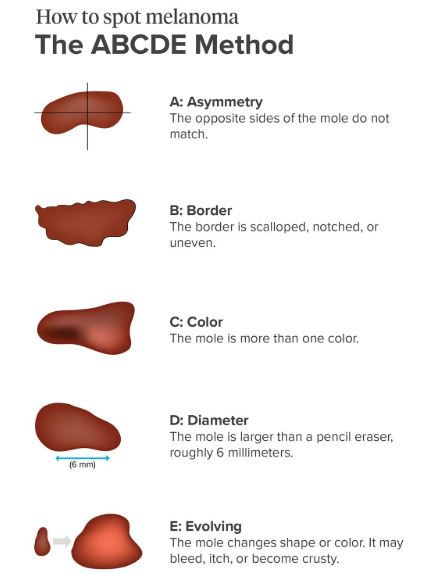

# Data Collection

Data was collected from Kaggle (https://www.kaggle.com/datasets/wanderdust/skin-lesion-analysis-toward-melanoma-detection) and saved on drive for easily accessible.

Defining the directories where our data sits, these are constants anyway so we're going to use these variables inn the future segments of our code.


In [ ]:
path_to_folder = '/content/gdrive/MyDrive/Colab Notebooks/skin-lesions'
data_train_path = '/content/drive/MyDrive/skin-lesions/train'
data_valid_path = '/content/drive/MyDrive/skin-lesions/valid'
data_test_path = '/content/drive/MyDrive/skin-lesions/test'

Import all the needed libs

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
import logging
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_files
from tqdm import tqdm
from collections import Counter
from keras.utils import to_categorical
from sklearn.datasets import load_files
from tqdm import tqdm
from collections import Counter
import os
import matplotlib.pyplot as plt




Define functions to load the data into Dataframes of image path and label colums

In [ ]:
def file_to_list (path):
    data = os.scandir(path)
    data2=[]
    for i in data:
      data2.append(os.path.abspath(i))
    return data2

def list_to_df (path,label):
  df_data = pd.DataFrame()
  df_data['image_path'] = file_to_list(path)
  df_data['label']=label
  return df_data

Load the training set into Dataframe with 3 types of label

In [ ]:
df=pd.concat([list_to_df(data_train_path+'/nevus','nevus'),list_to_df(data_train_path+'/melanoma','melanoma'),list_to_df(data_train_path+'/seborrheic_keratosis','seborrheic_keratosis')])


# EDA

<BarContainer object of 3 artists>

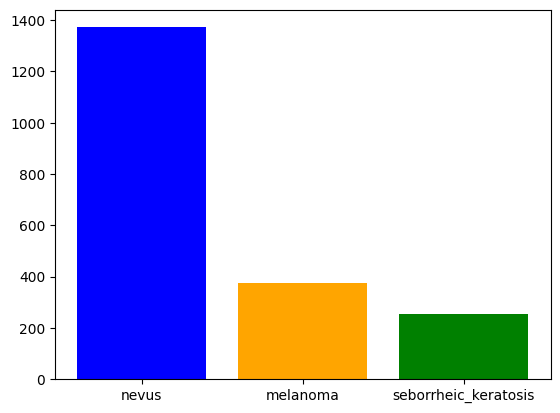

In [ ]:
classes_count = Counter(df['label'])

# Plot the classes to see comperison of sizes
plt.bar(classes_count.keys(), classes_count.values(), color=['blue', 'orange', 'green'])

As we can see the data is unbalanced so we going to upsample it which means we are going to duplicate pictures of classes with low data.

We will use the upsample not just to duplicate the pictures, but to rotate them and with that to improve the model strength.


In [ ]:
import pandas as pd
from sklearn.utils import resample
import skimage
from skimage import transform
import torch
import torchvision.transforms as transforms
from PIL import Image
import shutil, os

def upsample_df(df,path, feature_name, n_samples, boolean,rotation_angle=30):
    path1=path+feature_name
    i=0
    while i!=n_samples:
      if(boolean):
        help_upsample_df(path1,i,rotation_angle=30)
      df=pd.concat([df,list_to_df(path1,feature_name)])
      path1=path1
      i+=1
    return df


def help_upsample_df(path1,i,rotation_angle=30):
  for f in os.scandir(path1):
    im = Image.open(os.path.abspath(f))
    im=im.rotate(rotation_angle)
    rotated_filename = f"{str(f).split('.')[0]}_rotated_.{str(f).split('.')[-1]}"
    rotated_filename = rotated_filename[:-2].split("'")[-1]
    rotated_path = os.path.join(path1, rotated_filename)
    im.save(rotated_path)

df=upsample_df(df,data_train_path+'/', 'melanoma', 3,False, rotation_angle=30)
df=upsample_df(df,data_train_path+'/', 'seborrheic_keratosis', 4,False, rotation_angle=30)



<BarContainer object of 3 artists>

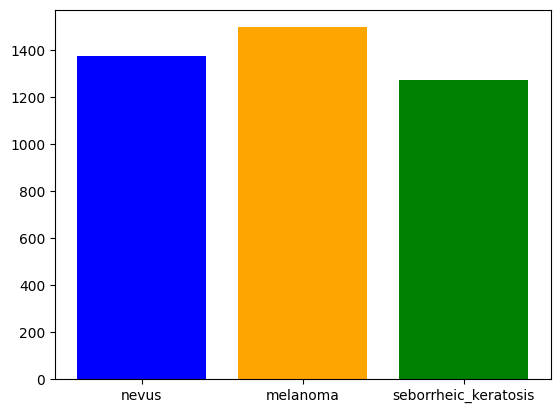

In [ ]:
classes_count = Counter(df['label'])

# Plot the classes to see comperison of sizes
plt.bar(classes_count.keys(), classes_count.values(), color=['blue', 'orange', 'green'])

Now the data is balance and more diverse.

Another way to see the data is by pie chart. A circular statistical graphic which is divided into slices to illustrate numerical proportion.

<Axes: title={'center': 'Category Images'}>

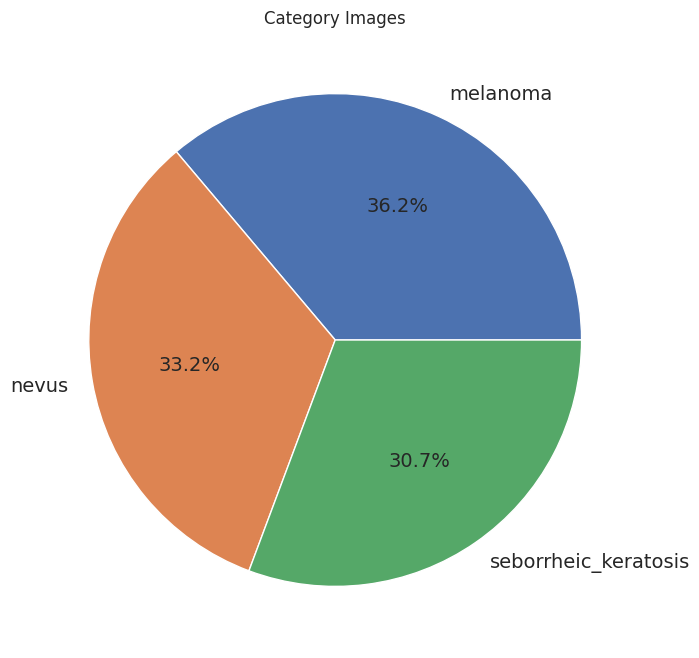

In [ ]:
sns.set(style='whitegrid')

pie_chart = pd.DataFrame(df['label'].replace(False,'Non-cancerous tissue').replace(True,'Cancerous tissue').value_counts())

pie_chart.reset_index(inplace=True)

pie_chart.plot(kind = 'pie',
               title = 'Category Images',
               y = 'label',
               autopct = '%1.1f%%',
               shadow = False,
               labels = pie_chart['index'],
               legend = False,
               ylabel = '',
               fontsize = 14,
               figsize = (18,8))

# Data Visualization

Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This communication is achieved through the use of a systematic mapping between graphic marks and data values in the creation of the visualization.

Lets take a look at the given shape of a single random negative image

In [ ]:
single_negative_image = df[df.label != 'melanoma']['image_path'].sample().iloc[0]


In [ ]:
def cv_image(file_name):
    return cv2.cvtColor(cv2.imread(file_name), cv2.COLOR_BGR2RGB)


In [ ]:
full_data_pd = df.copy()

In [ ]:
single_negative_image=cv_image(single_negative_image)
single_negative_image.shape


(2000, 3008, 3)

From the shape we can see that our images are 2000x3008 with three color channels.

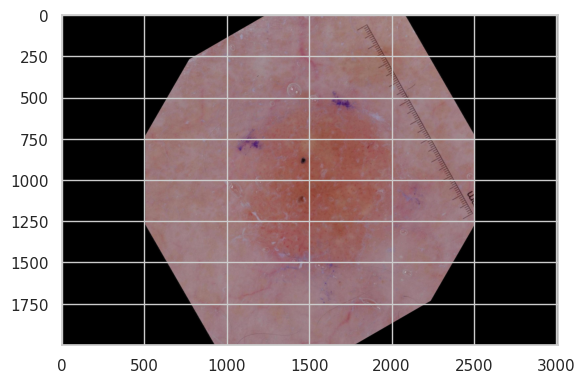

In [ ]:
plt.imshow(single_negative_image)
plt.show()

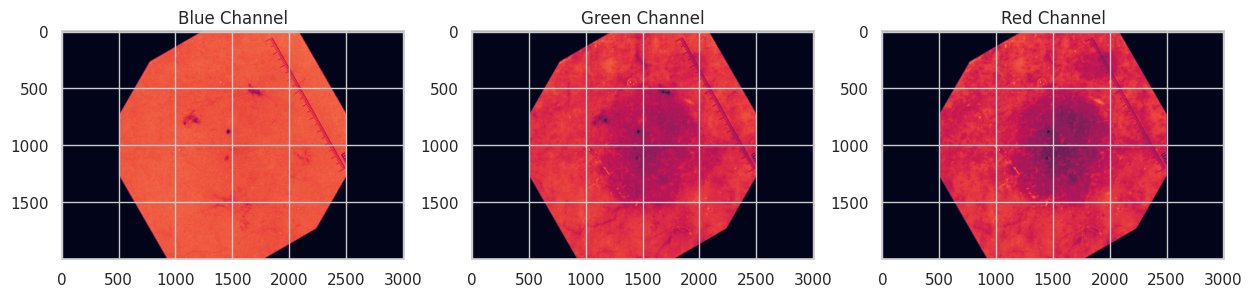

In [ ]:
#Splitting into channels
blue, green, red = cv2.split(single_negative_image)

# Plotting the images
fig = plt.figure(figsize = (15, 7.2))
fig.add_subplot(131)

plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

The differences between the color channels are visible to the naked eye. The red channel is clearly darker than the green and blue channels. The blue channel is darker than the green channnel. This means that the intensity of pixel values for the red channel is lower, closer to 0, then the blue and that in turn is darker than the green channel.

In [ ]:
random_positive_image = df[df.label == 'melanoma']['image_path'].sample().iloc[0]


In [ ]:
random_positive_image=cv_image(random_positive_image)
random_positive_image.shape

(768, 1024, 3)

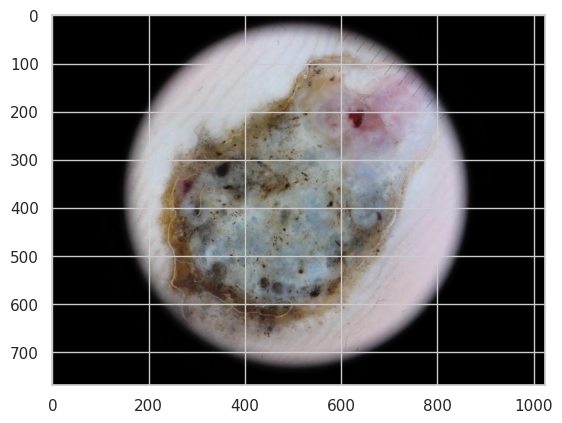

In [ ]:
plt.imshow(random_positive_image)
plt.show()

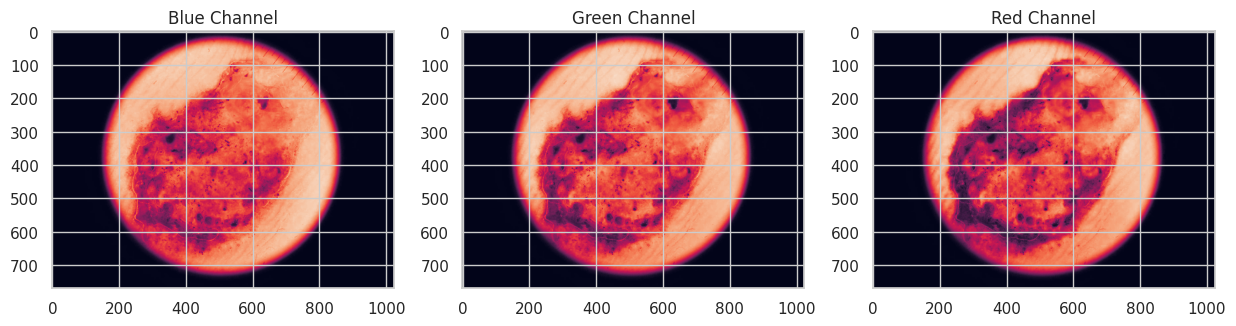

In [ ]:
#Splitting into channels
blue, green, red = cv2.split(random_positive_image)

# Plotting the images
fig = plt.figure(figsize = (15, 7.2))
fig.add_subplot(131)

plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

So we may find a similar pattern with positive pictures. It's worth noting that, although having a comparable color intensity hierarchy, the green channel in the random positive picture is darker than in the random negative image. Later, we'll look at the total pixel value distribution and see if we can identify a pattern.

# Image processing

In computer science, digital image processing is the use of a digital computer to process digital pictures using an algorithm. As a subset or field of digital signal processing, digital image processing has several benefits over analog image processing.

Noise Reduction:

*     Noise indicates that the pixels in the picture have different intensities
than the real pixel values received from the image.

*     The noise reduction algorithm is the technique of eliminating or decreasing noise from a picture.


Gaussian blur:

*     In image processing, a Gaussian blur (also known as Gaussian smoothing) is the technique of blurring an image using a Gaussian function, named after mathematician and scientist Carl Friedrich Gauss.
*     It is a commonly used effect in graphics software, usually to minimize visual noise and detail.

Adjust Contrast:

*     The Adjust Contrast tool adjusts an image's contrast or brightness by contrast stretching.
*     Pixel values less than a specific value are mapped to black, while pixel values greater than that value are assigned to white.

In [ ]:
def display_training_curves(training, validation, title, subplot):
  if subplot%10==1: # set up the subplots on the first call
    plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
    plt.tight_layout()
  ax = plt.subplot(subplot)
  ax.set_facecolor('#F8F8F8')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])

cols, rows = 4, 3
def grid_display(list_of_images, no_of_columns=2, figsize=(15,15), title = False):
    fig = plt.figure(figsize=figsize)
    column = 0
    z = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        if title:
            if i >= no_of_columns:
                plt.title(titles[z])
                z +=1
            else:
                plt.title(titles[i])
        plt.imshow(list_of_images[i])
        plt.axis('off')

161    /content/gdrive/MyDrive/Colab Notebooks/skin-lesions/train/melanoma012/ISIC_0012450.jpg
276     /content/gdrive/MyDrive/Colab Notebooks/skin-lesions/train/melanoma01/ISIC_0000550.jpg
Name: image_path, dtype: object
/content/gdrive/MyDrive/Colab Notebooks/skin-lesions/train/melanoma012/ISIC_0012450.jpg
/content/gdrive/MyDrive/Colab Notebooks/skin-lesions/train/melanoma01/ISIC_0000550.jpg


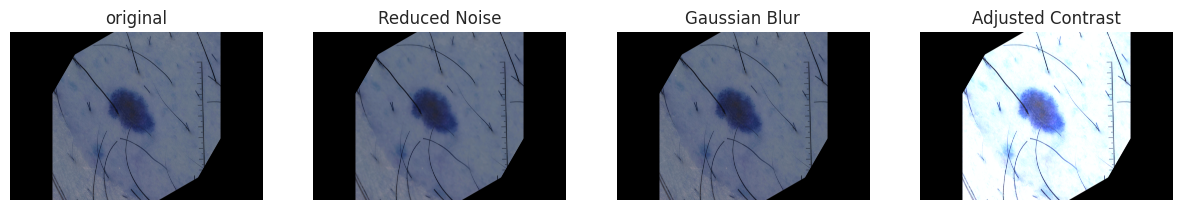

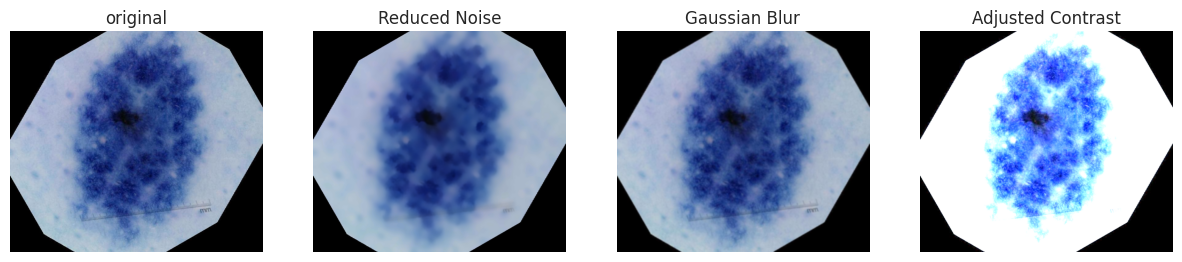

In [ ]:
image_list = df[df.label == 'melanoma'].sample(2)['image_path']
print(image_list)
image_all=[]
titles = ['original', 'Reduced Noise', "Gaussian Blur", 'Adjusted Contrast']
for image_id in image_list:
    print(image_id)

    img = cv2.imread(image_id,1)
    image_all.append(img)
    #Reducing Noise
    result = cv2.fastNlMeansDenoisingColored(img,None,20,10,7,21)
    image_all.append(result)
    #Gaussian Blur
    blur_image = cv2.GaussianBlur(img, (7,7), 0)
    image_all.append(blur_image)
    #Adjusted contrast
    contrast_img = cv2.addWeighted(img, 2.5, np.zeros(img.shape, img.dtype), 0, 0)
    image_all.append(contrast_img)
grid_display(image_all, 4, (15,15), title = True)

Adaptive Thresholding:
* Adaptive thresholding is a form of thresholding that takes into account spatial variations in illumination.
* We present a technique for real-time adaptive thresholding using the integral image of the input.

Binary Thresholding:
* Image thresholding is a simple, yet effective, way of partitioning an image into a foreground and background.
This image analysis technique is a type of image segmentation that isolates objects by converting grayscale images into binary images.
* Binary (Bi-valued) Image means, only bi or two intensity values can be used to represent the whole image.

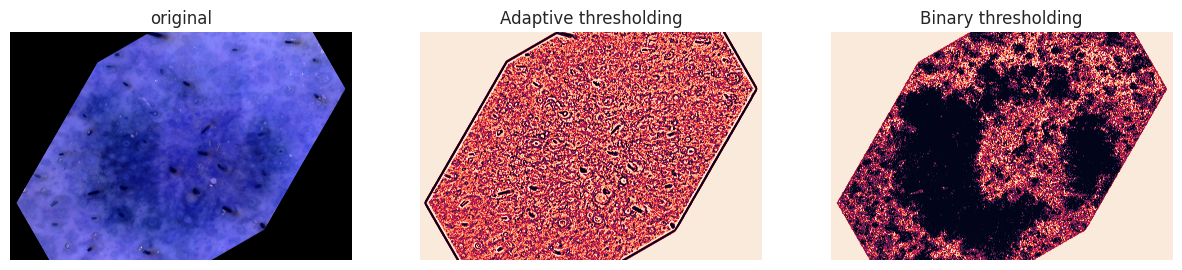

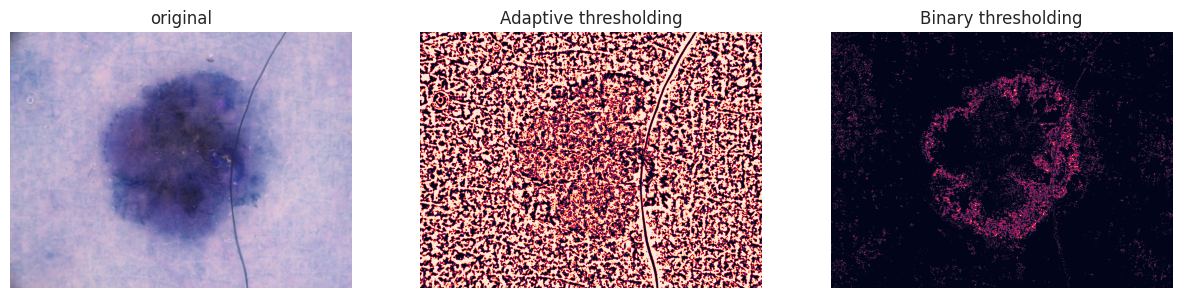

In [ ]:
image_list = df[df.label == 'melanoma'].sample(2)['image_path']
image_all=[]
titles = ['original', 'Adaptive thresholding', "Binary thresholding"]
for image_id in image_list:
    img = cv2.imread(image_id,1)
    image_all.append(img)
    #Adaptive Thresholding..
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    thresh1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
    image_all.append(thresh1)
    #Binary Thresholding...
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    res, thresh = cv2.threshold(hsv[:, :, 0], 0, 255, cv2.THRESH_BINARY_INV)
    image_all.append(thresh)
grid_display(image_all, 3, (15,15), title = True)

Otsu’s Binarization

* In computer vision and image processing, Otsu's method is used to perform automatic image thresholding.
* In the simplest form, the algorithm returns a single intensity threshold that separate pixels into two classes, foreground and background.

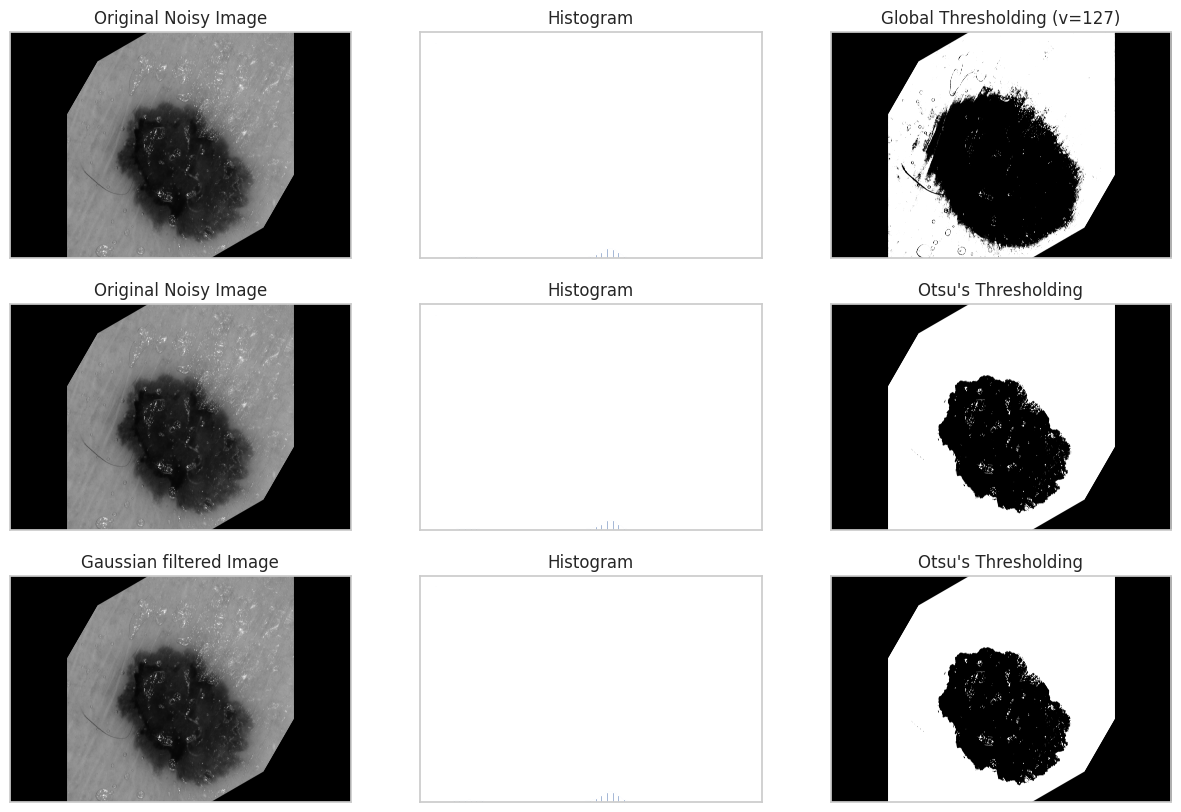

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/skin-lesions/train/melanoma012/ISIC_0014919.jpg', 0)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(15,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# CNN

In this section, we present the implementation of a Convolutional Neural Network (CNN) for the detection of melanoma, a deadly form of skin cancer. CNNs have shown remarkable success in various image recognition tasks, making them a natural choice for analyzing dermatological images. We will discuss the architecture of our CNN, the dataset used for training and evaluation, the training process, and finally, the performance evaluation of the model. This implementation aims to demonstrate the effectiveness of CNNs in aiding dermatologists and healthcare professionals in the early and accurate detection of melanoma.





In [ ]:
!pip install -Uqq fastai2
import fastai2
from fastai2.vision import *
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00


The Data loaders class is used to make our dataset which we would pass into it available as training and validation sets.

In [ ]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

This is our datablock API, we are using it to pass information to our data loaders class about the kind of data we are working on ('blocks=(ImageBlock, CategoryBlock)'),

how the data loaders class will get the data ('get_items=get_image_files'),
how the validation set is to be created ('splitter=RandomSplitter(valid_pct=0.2, seed=42)'),

and how to get the labels for our data set ('get_y=parent_label') which in this case is from the name of the folder our files are in.This can be seen as a template which will be used by our data loaders class.

In [ ]:
imeges = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = imeges.dataloaders(data_train_path)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


Show sample from the dataloaders object

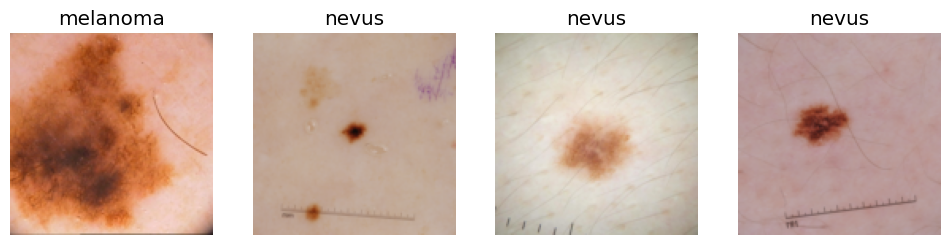

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

### **Model Comparison**

## **ResNet18**
ResNet18 is a deep convolutional neural network architecture, which is part of the ResNet (Residual Network) family.

ResNet18, specifically, has 18 layers, including convolutional layers, batch normalization layers, ReLU activation layers, and a global average pooling layer, followed by a fully connected layer. The main innovation behind ResNet is the introduction of residual connections, or skip connections, which allow the network to learn residual functions and combat the vanishing gradient problem in deep networks.

After 4 epochs we got error rate of 0.17 that means presicion of 83%.

In [ ]:
# define and import the model
learn18 = cnn_learner(dls, resnet18, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 109MB/s]


In [ ]:
# train the model over 4 epochs
learn18.fine_tune(4)

As we can see in the graph the train loss continue to go down until 200 epochs. In addition we can see that around 100 epochs the valid loss got a little higher and get stable around 0.5. In this stage the model overfitting.

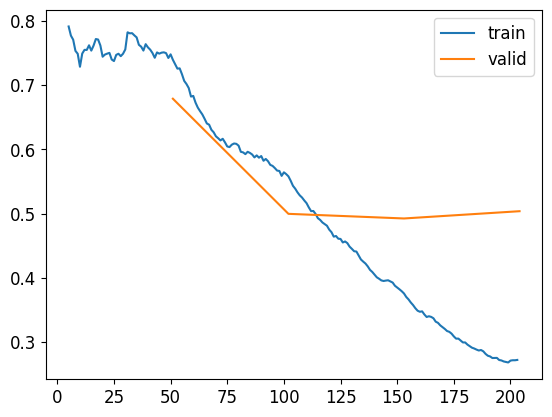

In [ ]:
learn18.recorder.plot_loss()


This interp object aids in analyzing the classifier's performance by generating a confusion matrix, which visually represents the number of correctly and incorrectly classified instances for each class in the dataset.
We can see in the matrix that the most FP is when the photo is melanoma. we can add more data to this group, clean the photos or try use other model.

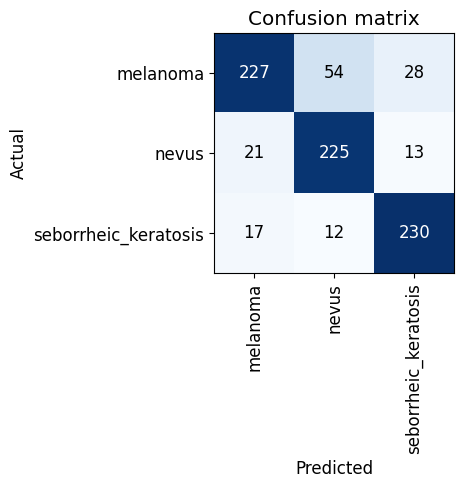

In [ ]:
interp18 = ClassificationInterpretation.from_learner(learn18)
interp18.plot_confusion_matrix()

### **ResNet34**

ResNet34 is a specific configuration of the Residual Network (ResNet) architecture, which is a popular and widely-used neural network architecture for image classification tasks.

ResNet34 consists of 34 layers, including convolutional layers, batch normalization layers, ReLU activation layers, and a fully connected softmax layer at the end. The key innovation of ResNet is the introduction of "residual connections" (also known as "skip connections") that allow the network to learn the residual mapping between layers, which helps mitigate the vanishing gradient problem that occurs in deep neural networks.

In [ ]:
# define and import the model
learn34 = cnn_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 99.7MB/s]


After 4 epochs we got error rate of 0.168 that means presicion of 84.2%.

In [ ]:
# train the model over 4 epochs
learn34.fine_tune(4)

As we can see in the graph the train loss continue to go down until 200 epochs. In addition we can see that around 100 epochs the valid loss got a little higher and get stable around 0.5. In this stage the model overfitting.

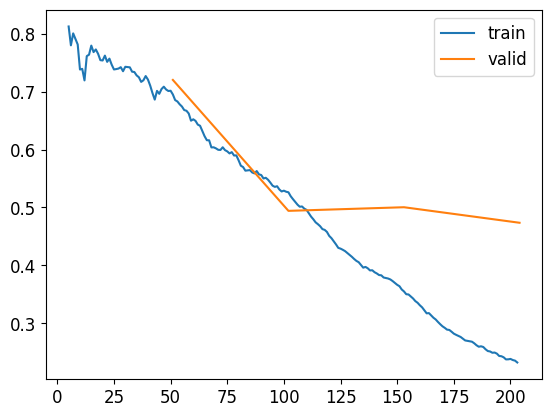

In [ ]:
learn34.recorder.plot_loss()

This interp object aids in analyzing the classifier's performance by generating a confusion matrix, which visually represents the number of correctly and incorrectly classified instances for each class in the dataset. We can see in the matrix that the most FP is when the photo is melanoma. we can add more data to this group, clean the photos or try use other model.

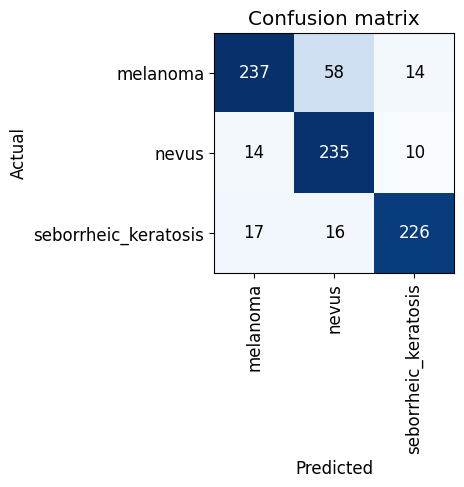

In [ ]:
interp34 = ClassificationInterpretation.from_learner(learn34)
interp34.plot_confusion_matrix()

# **Summery**

Our study focuses on enhancing melanoma detection using data science techniques, aiming to aid dermatologists in clinical practice. We begin by emphasizing the critical need for accurate detection methods in addressing the challenges posed by melanoma.

Gathering information from trustworthy places makes sure we have lots of different and fair examples to train our model. We sorted out the data into different groups and looked at it closely to see how many examples we have of each type. This helps us decide how to get the data ready for our model.

Comparing the performance of the ResNet18 and ResNet34 architectures reveals distinct characteristics that influence their suitability for melanoma detection. The ResNet18 model, with its shallower depth of 18 layers, demonstrates commendable performance, achieving an error rate of 0.17 after four epochs of fine-tuning. However, its efficacy may be limited by its relatively simpler architecture, potentially leading to suboptimal feature extraction and classification.

In contrast, the ResNet34 model, boasting a deeper architecture with 34 layers, exhibits slightly superior performance with an error rate of 0.168 under similar training conditions. The increased depth allows for more complex feature representation and abstraction, enabling the model to capture nuanced patterns indicative of melanoma. Despite these differences, both models showcase considerable promise in melanoma detection, with the ResNet34 model edging slightly ahead in terms of accuracy and potential for robust classification. Further analysis and experimentation are warranted to fully elucidate the nuanced trade-offs between model complexity and performance in the context of melanoma detection.